ME200, Johannes Ruf and Luitgard Veraart

# Day 2: Probability distributions and some plotting

In this notebook we will learn three different topics:

* How we can use Python to generate samples from different distributions.
* How to create a histogram plot.
* How to obtain the PDFs and CDFs from different distributions. (Time permitting)

## Generating samples from different distributions

All of the named distributions that we’ll encounter have been implemented in Python, or more specifically, in the `numpy` library.

In [66]:
import numpy as np

For example, we can generate samples from the Binomial distribution as follows:

In [67]:
sample_size = 10

In [68]:
n = 10
p = 0.2

In [69]:
np.random.binomial(n, p, sample_size)

array([6, 2, 1, 2, 1, 0, 2, 2, 1, 3])

We can check the [documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions) for the Python commands for other distributions.

As we saw yesterday, from any discrete distribution we can sample via `random.choice`. As an example, let us sample from a distribution that has the values 2, 4, 6, 8, 10 with probabilities 0.1, 0, 0.3, 0.6, 0, i.e., the corresponding random variables satisfy:

\begin{align*}
    P[X = 2] &= 0.1;\\
    P[X = 4] &= 0;\\
    P[X = 6] &= 0.3;\\
    P[X = 8] &= 0.6;\\
    P[X = 10] &= 0.
\end{align*}

In [139]:
sample_size = 10

In [140]:
v = [2, 4, 6, 8, 10]
probs = [0.1, 0, 0.3, 0.6, 0]

In [141]:
np.random.choice(v, size=sample_size, p=probs, replace=True)    
# replace=True not required but safer to include it

array([6, 6, 2, 8, 8, 8, 8, 8, 8, 6])

We see: we mostly get 8's, which has the highest probility. We don't get any 4's or 10's.

If we just want to use the uniform distribution (i.e., all values have equal probability), then we don't need to specify the `p` argument. I.e., the following generates `sample_size` many values from DUnif(v). 

In [142]:
np.random.choice(v, size=sample_size, replace=True)

array([ 2,  4,  8, 10,  8,  8,  2,  6, 10,  8])

The continuous uniform distribution Unif(0, 1) can be obtained by `random.random` as follows:

In [74]:
sample_size = 10

In [75]:
np.random.random(size=sample_size)

array([0.52010394, 0.15087767, 0.06003053, 0.46563627, 0.51037452,
       0.30811325, 0.80560468, 0.1918651 , 0.00567675, 0.78175263])

## Histograms

Plotting histograms requires a plotting library (`matplotlib.pyplot`). The name is a bit inconvenient but usually it's shortened as `plt`:

In [76]:
import matplotlib.pyplot as plt

Let's first generate a lot of samples from the standard normal distribution:

In [109]:
sample_size = 10000

In [136]:
samples = np.random.standard_normal(size=sample_size)

We can now plot the histogram as follows (note the semicolon at the end that oppresses the output, which doesn't look nice):

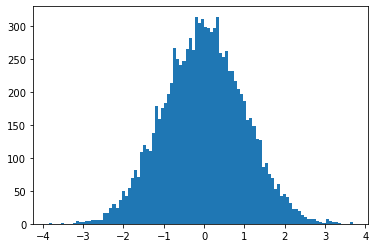

In [137]:
plt.hist(samples, bins=100);

The following code achieves the same, but is a bit 'cleaner'. It's good to get used to a good programming style. It also adds a titel and some description of the axis:

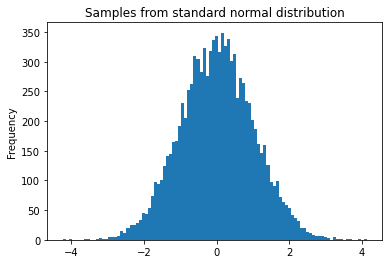

In [112]:
fig, ax = plt.subplots()
ax.hist(samples, bins=100)
ax.set_title("Samples from standard normal distribution")
ax.set_ylabel("Frequency");

## Obtaining PDFs and CDFs in Python

We might require the PDFs and CDFs of various distributions. This requires yet another Python package, namely `scipy.stats`:

In [129]:
import scipy.stats as stats

For example, to get the value of the PDF and CDF (of a normally distributed random variable) at `x` we can use:

In [130]:
x = 0.9
mu = 1
sigma = 2

In [131]:
stats.norm.pdf(x, loc=mu, scale=sigma)

0.19922195704738202

In [132]:
stats.norm.cdf(x, loc=sigma, scale=sigma)

0.29115968678834636

The following code plots the PDF of a normal random variable:

In [133]:
x = np.linspace(-4, 4, 1000)     # 1000 points equally spaced between -4 and 4

In [134]:
y = stats.norm.pdf(x, loc=mu, scale=sigma)    # the corresponding values of the PDF

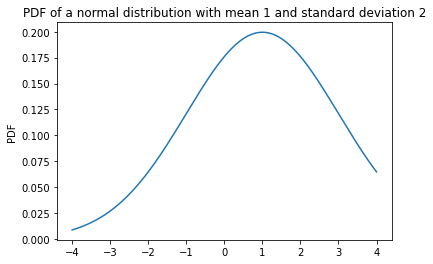

In [135]:
fig, ax = plt.subplots()
ax.plot(x, y)

ax.set_title(f"PDF of a normal distribution with mean {mu} and standard deviation {sigma}")
#the previous command includes text (a string) that depends on the variables 
#(note the f before the first quotation mark)

ax.set_ylabel("PDF");

In [ ]:
r.pang@lse.ac.uk